# Machine Learning
# Compte rendu : PCA
# Binome :
### GUIR Abdelbaki / Meridja Adel

# Exercise #1. PCA 

This first example allows you to go through PCA step by step.
It is applied on the data of student marks presented during the course.

---

Rappel des étapes de l'ACP :

- Centrer et réduire les données X
- Calculer la matrice de covariance des données : X.T * X
- Calculer les valeurs et vecteurs propres de la matrice de covariance.
- Ordonner les couples (valeur propre : a_i, vecteur propres : v_i) par ordre décroissant des valeurs propres.
- Garder les q premiers couples afin de construire la matrice V = [v1 v2 … vq].
- Ici : la valeur propres a_i est égale à l'inertie portée par l'axe v_i.


#### importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import normalize 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("notes.csv")
X = df.iloc[:, 1:].values     # The Original matrix. Each row is an 4 dim figures.
names = df.iloc[:, :1].values # The name of the student.
print(names.T)

[['jean' 'alan' 'anni' 'moni' 'didi' 'andr' 'pier' 'brig' 'evel']]


## Standardisation of X
Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). It is useful to standardize attributes for a model. Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data

In [5]:
std_scale = preprocessing.StandardScaler().fit(X)
Xn = std_scale.transform(X)
Xn

array([[-1.08650256, -1.28173989, -1.50366322, -1.61940264],
       [-0.4938648 , -0.61300603, -0.63985669, -0.73070607],
       [-1.08650256, -0.94737296,  0.22394984, -0.19748813],
       [ 1.43220792,  1.560379  ,  1.51965963,  1.75764432],
       [ 1.28404848,  1.39319553,  0.51188535,  0.86894776],
       [ 0.39509184,  0.05572782, -1.35969546, -1.0861847 ],
       [-1.234662  , -0.94737296,  1.08775637,  0.51346913],
       [ 0.9877296 ,  0.89164514, -0.49588893, -0.19748813],
       [-0.19754592, -0.11145564,  0.65585311,  0.69120844]])

Compute and print the mean and the standard deviation of the transformed data (Xn) using "np.mean" and "np.std". What do you notice?

In [6]:
print("mean of Xn = ", (np.mean(Xn, axis=0))) 
print("standard deviation of Xn = ", (np.std(Xn, axis=0))) 

la moyenne de Xn =  [ 1.81953218e-16 -2.20502629e-16  2.34380416e-16  2.46716228e-17]
l'ecart type de Xn =  [1. 1. 1. 1.]


We notice that the standard deviation is equal to 1 in most cases which means that the data is normalised
therefore, the mean goes to 0 which means the data is centered

### Computing the covariance matrix

We could use Numpy :
- cov_mat = np.cov(...)

or directly as follows...
- cov_mat = Xn.T.dot(Xn) / (Xn.shape[0]-1)

Check both implementations and compare the results.

In [ ]:
# COMPLETE THE CODE HERE
cov_mat = np.cov(Xn.T)
print('Covariance matrix shape: ',cov_mat.shape)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix shape:  (4, 4)
Covariance matrix 
[[1.125      1.10535269 0.25507342 0.57166198]
 [1.10535269 1.125      0.44627989 0.73297183]
 [0.25507342 0.44627989 1.125      1.07010647]
 [0.57166198 0.73297183 1.07010647 1.125     ]]


### we can notice that the shape is 4*4 which is n = 4

## Eigen decomposition of the covariance matrix

Here, the function "eig" from the linear algebra package of Numpy can be used ("np.linalg")


In [ ]:
# COMPLETE THE CODE HERE
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors shape: ', eig_vecs.shape)
print('Eigenvalues shape: ', eig_vals.shape)
print("eigen values are : ",eig_vals)
print("eigen vectors are : ",eig_vecs)

Eigenvectors shape:  (4, 4)
Eigenvalues shape:  (4,)
eigen values are :  [3.23514762e+00 1.25964828e+00 1.17930919e-03 4.02478885e-03]
eigen vectors are :  [[-0.47845402 -0.55194891  0.65222562  0.20257316]
 [-0.53191716 -0.40680183 -0.59742507 -0.44120255]
 [-0.44393038  0.62123362  0.36542644 -0.53240785]
 [-0.53951061  0.37938563 -0.29008368  0.69343082]]


In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order (All the eigenvalues):')
for tup in eig_pairs[:len(eig_vals)]:
    print(tup[0])

Eigenvalues in descending order (All the eigenvalues):
3.235147617959651
1.2596482840056908
0.004024788846949922
0.0011793091877088972


We can see that the two first eigen values are relatively bigger than the last two, we can say that the principal features that has much amount of informations





In [ ]:
percentage = (3.235147617959651 + 1.2596482840056908)/(3.235147617959651 + 1.2596482840056908 + 0.004024788846949922 + 0.0011793091877088972)
print("percentage of the two axis is : ",percentage*100,"%")

percentage of the two axis is :  99.88435337700759 %


### the relation between eigen values and the covariance matrix is that the sum of the eigen values equal to the sum of the diagonal elements of the matrix which is : 4.5 which represents the global inertie.

## Explained Variance 
After sorting the eigenpairs, the next question is "how many principal components are we going to choose for our new feature subspace?" A useful measure is the so-called "explained variance," which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [ ]:
tot_ev = sum(eig_vals)
var_exp = [(cur_ev / tot_ev)*100 for cur_ev in sorted(eig_vals, reverse=True)]

print(var_exp[:10])

[71.89216928799225, 27.992184089015353, 0.0894397521544427, 0.026206870837975495]


## plotting

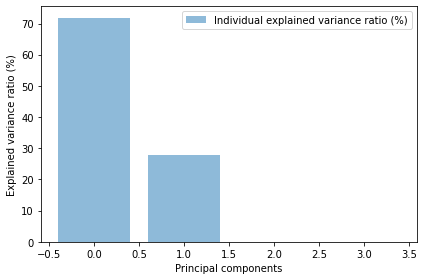

In [ ]:
num_eig_val = 4

plt.figure(figsize=(6, 4))
plt.bar(range(num_eig_val), var_exp[:num_eig_val], alpha=0.5, label='Individual explained variance ratio (%)')
plt.ylabel('Explained variance ratio (%)')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

## Projection matrix

The construction of the projection matrix that will be used to transform the initial data onto the new feature subspace. 

In the present case, only 1st and 2nd principal component shares the most inmportant part of information.

Hence, we can drop other components. Here, we are reducing the 4-dimensional feature space to a 2-dimensional feature subspace, by choosing the “top 2” eigenvectors with the highest eigenvalues to construct our d×k-dimensional eigenvector matrix W

In [ ]:
W = np.hstack((eig_pairs[0][1].reshape(4,1), 
               eig_pairs[1][1].reshape(4,1)
            ))
print('Matrix W shape :\n', W.shape)

Matrix W shape :
 (4, 2)


## Projection into the New Feature Space (of reduced dimension)
In this last step, we will use the 4×2-dimensional projection matrix W to transform our original vectors (Xstd : 9x4) in the new subspace

Xproj = X × W

In [ ]:
# COMPLETE THE CODE HERE
Xproj = np.dot(X,W)
print(Xproj.shape)

(9, 2)


the new matrix is consisted of two new features for the 9 students

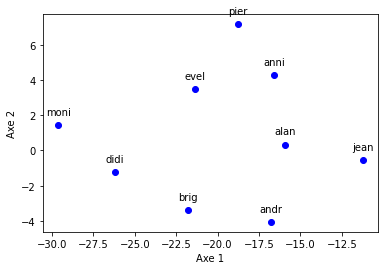

In [ ]:
plt.plot(Xproj[:,0], Xproj[:,1], 'bo')
plt.ylabel('Axe 2')
plt.xlabel('Axe 1')

i=0;
for x,y in zip(Xproj[:,0],Xproj[:,1]):
        plt.annotate(names[i,0], (x,y), textcoords="offset points",
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
        i = i+1
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn import decomposition

# COMPLETE THE CODE HERE
pca = PCA(n_components=2)
Xproj2 = pca.fit(Xn).transform(Xn)
print(Xproj2.shape)

(9, 2)


In [ ]:
print(pca.explained_variance_)

print('Xproj2:', Xproj2[:4,])

ev = [cur_ev for cur_ev in sorted(eig_vals, reverse=True)]
print(ev[:4])

print('Xproj:', Xproj[:4,])

[3.23514762 1.25964828]
Xproj2: [[-2.74282765 -0.42739619]
 [-1.24063553 -0.15275975]
 [-1.03089425  1.04928798]
 [ 3.13812885  0.18561802]]
[3.235147617959651, 1.2596482840056908, 0.004024788846949922, 0.0011793091877088972]
Xproj: [[-11.24918736  -0.55971542]
 [-15.9504974    0.33494802]
 [-16.60272927   4.27842698]
 [-29.62396223   1.41801972]]


### We can notice that the eigen values of the two projections are almost the same, with a small error

# Conclusion
we noticed that there is an inverted sign in the 1st column of Xproj2 and Xproj, this negative sign is caused by the fact that director vector is characterized by 2 senses one positive and the other negative.
This first part allowed us to make an PCA on a real example, step by step is by coding each step separately then using the sklearn.decomposition library which allowed us to obtain the same result in two lines of code



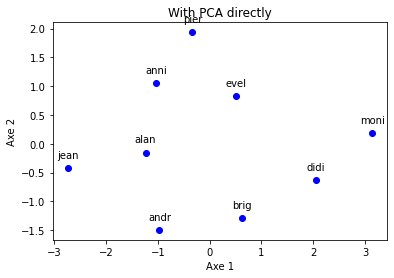

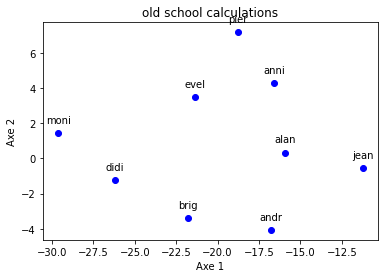

In [ ]:
plt.plot(Xproj2[:,0], Xproj2[:,1], 'bo'),plt.title("With PCA directly")
plt.ylabel('Axe 2')
plt.xlabel('Axe 1')

i=0;
for x,y in zip(Xproj2[:,0],Xproj2[:,1]):
        plt.annotate(names[i,0], (x,y), textcoords="offset points",
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
        i = i+1
plt.show()
plt.plot(Xproj[:,0], Xproj[:,1], 'bo'),plt.title("old school calculations")
plt.ylabel('Axe 2')
plt.xlabel('Axe 1')

i=0;
for x,y in zip(Xproj[:,0],Xproj[:,1]):
        plt.annotate(names[i,0], (x,y), textcoords="offset points",
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
        i = i+1
plt.show()

We can notice that the projection matrices (Xproj2 and the one in the cours) are identical but the ("eigen values, covariance matrix") are not the same because in the course we haven't done the standarisation.(centrage et réduction)..